Dropdown(description='Prima squadra:', options=('Uruguay', 'Portugal', 'France', 'Argentina', 'Brazil', 'Mexic…

Dropdown(description='Seconda squadra:', options=('Uruguay', 'Portugal', 'France', 'Argentina', 'Brazil', 'Mex…

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

Button(description='Show ranking', icon='check', style=ButtonStyle(), tooltip='Show ranking')





Brazil versus Uruguay


The probability of team Brazil achieving victory is 82.7%
The probability of team Uruguay achieving victory is 17.3%






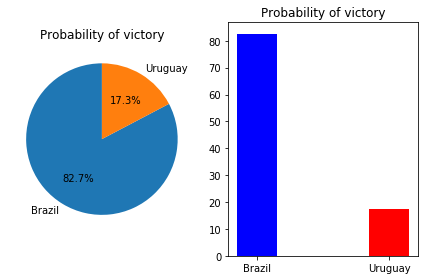

In [3]:
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

ranking = {"Uruguay": 14, "Portugal": 4, "France": 7, "Argentina": 5, 
           "Brazil": 2, "Mexico": 15, "Belgium": 3, "Japan": 61,
           "Spain": 10, "Russia": 70, "Croatia": 20, "Denmark": 13, 
           "Sweden": 24, "Switzerland": 6, "Colombia": 16, "England": 12}
points = {"Uruguay": 9, "Portugal": 5, "France": 7, "Argentina": 4, 
           "Brazil": 7, "Mexico": 6, "Belgium": 9, "Japan": 4,
           "Spain": 5, "Russia": 6, "Croatia": 9, "Denmark": 5, 
           "Sweden": 6, "Switzerland": 5, "Colombia": 6, "England": 6}
matches_ottavi = [["Uruguay", "Portugal"], ["France", "Argentina"], 
           ["Brazil", "Mexico"], ["Belgium", "Japan"],
           ["Spain", "Russia"], ["Croatia", "Denmark"], 
           ["Sweden", "Switzerland"], ["Colombia", "England"]]
teams = ["Uruguay", "Portugal", "France", "Argentina", 
           "Brazil", "Mexico", "Belgium", "Japan",
           "Spain", "Russia", "Croatia", "Denmark", 
           "Sweden", "Switzerland", "Colombia", "England"]
dr_ottavi = {"Uruguay": 8, "Portugal": 4, "France": 5, "Argentina": 1, 
           "Brazil": 7, "Mexico": 2, "Belgium": 10, "Japan": 3,
           "Spain": 2, "Russia": 7, "Croatia": 9, "Denmark": 4, 
           "Sweden": 6, "Switzerland": 4, "Colombia": 6, "England": 8}
total_goals = {"Uruguay": 5, "Portugal": 5, "France": 3, "Argentina": 3, 
           "Brazil": 1, "Mexico": 3, "Belgium": 9, "Japan": 4,
           "Spain": 6, "Russia": 8, "Croatia": 7, "Denmark": 2, 
           "Sweden": 5, "Switzerland": 4, "Colombia": 5, "England": 8}
infortuni = {"Uruguay": 2, "Portugal": 0, "France": 0, "Argentina": 2, 
           "Brazil": 0, "Mexico": 1, "Belgium": 0, "Japan": 1,
           "Spain": 0, "Russia": 0, "Croatia": 0, "Denmark": 0, 
           "Sweden": 1, "Switzerland": 2, "Colombia": 2, "England": 0}
team1 = widgets.Dropdown(options=teams, description='Prima squadra:', disabled=False)
team2 = widgets.Dropdown(options=teams, description='Seconda squadra:', disabled=False)


def get_result1(squadra1):
    first_team = ranking[squadra1]
    
    dr_first = dr_ottavi[squadra1]
    
    points_first = points[squadra1]
   
    first_result = (((dr_first / first_team) * points_first)) 
    
    return first_result
  
def get_result2(squadra2):
    second_team = ranking[squadra2]
    
    dr_second = dr_ottavi[squadra2]
    
    points_second = points[squadra2]
    
    second_result = (((dr_second / second_team) * points_second))
    
    return second_result


def get_percentage(first1_result, second2_result, squadra1, squadra2):
    get_percentage.percent_win_1 = round((100 * first1_result) / (first1_result + second2_result), 1)
    get_percentage.percent_win_2 = round((100 * second2_result) / (first1_result + second2_result), 1)
    
    print("\n")
    print("\n")
    print(color.BOLD + "{squadra1} versus {squadra2}".format(squadra1=squadra1,squadra2=squadra2) + color.END)
    print("\n")
    print("The probability of team {squadra1} achieving victory is {percent1}%".format(squadra1=squadra1, percent1=get_percentage.percent_win_1)) 
    print("The probability of team {squadra2} achieving victory is {percent2}%".format(squadra2=squadra2, percent2=get_percentage.percent_win_2))
    print("\n")
    print("\n")

    
    
def button_clicked(self):
    squadra_one = team1.value
    squadra_two = team2.value
    
    try:
        total1 = get_result1(squadra_one)
        total2 = get_result2(squadra_two)
        get_percentage(total1, total2, squadra_one, squadra_two)
        
        labels = [squadra_one, squadra_two]
        y = [get_percentage.percent_win_1, get_percentage.percent_win_2]
        

        fig, (ax1, ax2) = plt.subplots(ncols=2)
        ax1.pie(y, labels=labels, autopct='%1.1f%%', startangle=90)
        ax1.set_title("Probability of victory")

        xticks = [1,2] 

        ax2.bar(xticks,y, color=['b','r'], width=0.3, align="center")
        ax2.set_title("Probability of victory")
        ax2.set_xticklabels(labels)  
        ax2.set_xticks(xticks)

        fig.tight_layout()
        plt.show()
        
    except KeyError:
        print("The team you've entered doesn't exist. Try again...")
        start()
        
def start1():
    
    button = widgets.Button(
        description='Click me',
        disabled=False,
        button_style='', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Click me',
        icon='check'
    )
    
    display(team1)
    display(team2)
    display(button)
    
    button.on_click(button_clicked)
#     interact(button_clicked)
      
start1()

def get_ranking():
    ranking_total = {}  
    for team in teams:
        points = round(get_result1(team), 2)
        ranking_total[team] = points
    return(ranking_total)
    
sorted_by_value = sorted(get_ranking().items(), key=lambda kv: kv[1])


new_ranking = []
for i in range(len(sorted_by_value)):
    new_ranking.append(sorted_by_value[-1])
    sorted_by_value.remove(sorted_by_value[-1])
    

def button_clicked(self):
    for item in new_ranking:
        if len(item[0]) == 11:
            print(*item, sep = "          ")
        elif len(item[0]) == 10:
            print(*item, sep = "           ")
        elif len(item[0]) == 9:
            print(*item, sep = "            ")
        elif len(item[0]) == 8:
            print(*item, sep = "             ")
        elif len(item[0]) == 7:
            print(*item, sep = "              ")
        elif len(item[0]) == 6:
            print(*item, sep = "               ")
        elif len(item[0]) == 5:
            print(*item, sep = "                ")
        
def start():
    
    button = widgets.Button(
        description='Show ranking',
        disabled=False,
        button_style='', 
        tooltip='Show ranking',
        icon='check'
    )
    
    display(button)
    
    button.on_click(button_clicked)
      
start()